# In-Class Exercise 4: Advanced Random Sampling

In this notebook, we will explore some slightly more complicated random sampling methods. 

Some of the following steps have already been incorporated into the templates as denoted by a ✅. 

Study these portions of the notebook, and make your own additions where necessary. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# import some standard functions for performing direct sampling on
# * sample = sampleDiscrete(x, p, prn)
# * sample = sampleUniform(x_min, x_max, prn)
# * sample = sampleRisingLinear(x_min, x_max, prn)
# * sample = sampleFallingLinear(x_min, x_max, prn)
import direct_sampling as ds

# import some standard functions for generating random distribution
# functions
# * x, p = randomHistogram(num_bins=6, x_min=0, x_max=10)
# * x, p = randomLine(scale=5)
# * x, p = randomPiecewiseLinear(num_bins=6, x_min=0, x_max=10)
import random_distributions as rd

# import some standard functions for plotting distributions
# * plotHistogram(x, p, samples=None, hist_bins=50)
# * plotLine(x, p, samples=None, hist_bins=50)
# * plotPiecewiseLinear(x, p, samples=None, hist_bins=50)
# * plotContinuous(x_min, x_max, pdf_fcn, bounding_fcn=None, samples=None, hist_bins=50)
import plot_distributions as pd

## I. Histogram Sampling

The cell below defines a five-bin histogram PDF between x=0 and x=10.  (Since it uses random numbers, it will be different each time.)

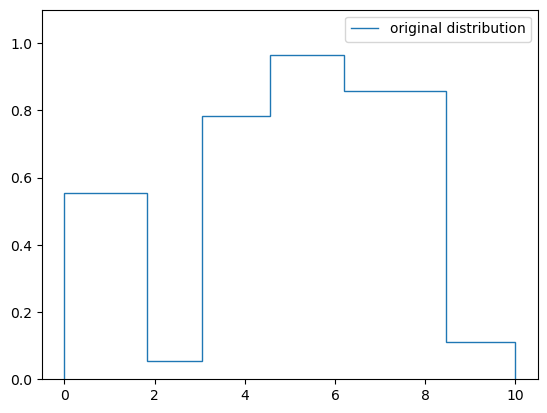

In [3]:
x, p = rd.randomHistogram()
pd.plotHistogram(x,p)

### Exercise

Use the outline below as a guide to perform histogram sampling for this PDF. Remember, histogram sampling is a two-step process involving both direct discrete sampling and direct continuous sampling. Fill in the missing parts of the function `sampleHist` according to the following steps:

1. Discrete sampling: Select one of the bins in the histogram based on the relative areas represented by each histogram bin
   1. Create an array, `widths`, that contains N bin widths.
   2. Create an array, `areas`, that contains N bin areas.
   3. Normalize the area array to generate the normalized PDF probabilities, `pdf`.
   4. Generate the CDF, `cdf`.
   5. Generate a pseudo-random number, `prn`.
   5. Search the CDF to determine which bin, `k`, is sampled. This will look just like the direct discrete random   
      sampling exercise from In-Class Exercise 3.
  
2. Continuous sampling: Now that one of the bins has been chosen, sample within that uniform, continuous bin to yield a final sample
   1. Generate a second random number, `prn2`.
   2. Use `prn2` to sample the shifted uniform distribution to produce an output.

In [4]:
def sampleHist(x, p, prn1, prn2):
    """Sample a histogram using a random variable
    
    Parameters
    ----------
    x : Iterable of float
        The domain values of the function
    p : Iterable of float
        The probability values corresponding to domain values
    prn1 : Real
        A first pseudo-random number
    prn2 : Real
        A second pseudo-random number

    Returns
    -------
    float : the sampled value
    """
    # some value checking to start
    if len(x) < 2:
        raise ValueError('There must be at least 2 histogram boundaries')
    if len(x) != len(p) + 1:
        raise ValueError(f'The size of the histogram boundaries {len(x)} must be one larger than the list of probabilities {len(f)}')
        
    out = 0.0
    
    # create an array of bin widths
    widths = np.diff(x) # <-- FILL THIS IN
    
    # create an arrray of areas Homework 1within each bin
    areas = widths * p 
    
    # create a list of bins to be sampled
    bins = np.arange(0,len(p)) # <-- FILL THIS IN
    
    # sample discrete PDF of the bins
    bin = ds.sampleDiscrete( bins, areas , prn1)  # <-- COMPLETE THIS LINE
    
    # sample the uniform PDF defined by that bin
    out = ds.sampleUniform( x[bin], x[bin+1] , prn2)  # <-- COMPLETE THIS LINE
        
    return out

In [5]:
# test your function by passing in some carefully selected values for the random numbers
sampleHist(x, p, 0.9, 0.5)

7.336653767519213

### Analysis
1. Generate 1000 samples and plot a histogram of your results ✅.  Does it match your expectations?

In [6]:
# test with a small number of samples first
n_samples = 100000
samples = np.array([sampleHist(x, p, np.random.rand(), np.random.rand()) for _ in range(n_samples)])

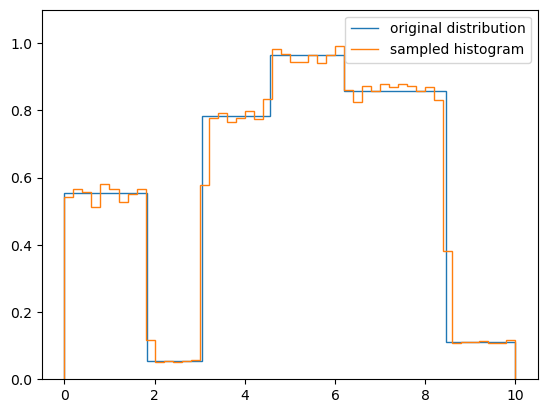

In [7]:
pd.plotHistogram(x, p, samples)

## II. Arbitrary Linear Distribution

If a distribution is defined by an arbitrary line, we know the
end points of the line $(x_1, p_1)$ and $(x_2, p_2)$.

The cell below creates a random linear distribution.

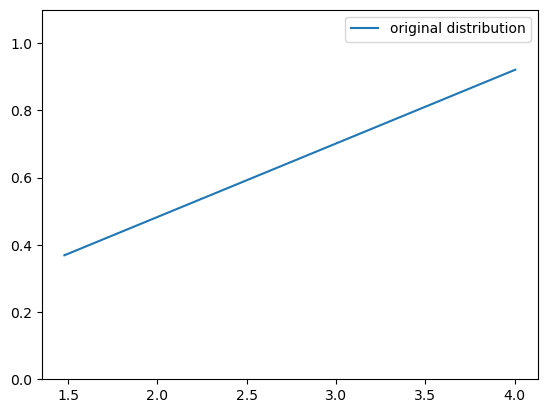

In [9]:
x, p = rd.randomLine()
pd.plotLine(x, p)

### Exercise

Write a function that will use two random variables to sample
from an arbitrary line using a graphical approach.

Fill in the missing parts of `sampleLine` according to the following steps.

1. Break the trapezoid formed by the line into a rectangle and a triangle
   1. Find the height of the rectangle
   2. Find the height of the triangle
2. Find the area of the rectangle and the triangle
3. Sample whether your ultimate point will come from the rectangle or the triangle
4. Sample your ultimate point from either the rectangle or the triangle

In [10]:
def sampleLine(x_bounds, p_heights, prn1, prn2):
    """
    Sample a value from a probability distribution defined
    by two points, (x_1, p_1) and (x_2, p_2)
    
    inputs
    -------
    x_bounds : numpy array of Real
        The bounds of the domain
    p_heights : numpy array of Real
        The probabilities at the bounds
    prn1 : Real
        A first pseudo-random number
    prn2 : Real
        A second pseudo-random number
       
    returns
    --------
    Real sample bewteen x_bounds
    
    """
    # make sure we only have non-negative probabilities
    if np.any(p_heights<0):
        raise ValueError(f'All probabilities must be >=0, but probability {p} was provided.')

    sample = 0.0
            
    # determine the width of the region
    width = x_bounds[1] - x_bounds[0]
    
    # determine the height and area of the rectangle
    h_rectangle = np.min(p_heights) 
    area_rectangle = width * h_rectangle
    
    # determine the height of the triangle
    h_triangle = np.max(p_heights) - h_rectangle
    area_triangle = 0.5 * width * h_triangle
    
    # fill in the logic for the sampling here
    # you can use the sampling functions 
    # sampleUniform, sampleRisingLinear, sampleFallingLinear
    # (hint: be sure to handle both cases of p1 > p2 and p1 < p2)
    if prn1 < area_rectangle/(area_triangle + area_rectangle):
        sample = ds.sampleUniform(x_bounds[0], x_bounds[1], prn2)
    elif p_heights[0] < p_heights[1]:
        sample = ds.sampleRisingLinear(x_bounds[0], x_bounds[1], prn2)
    else:
        sample = ds.sampleFallingLinear(x_bounds[0], x_bounds[1], prn2)
    
    return sample
            

In [11]:
# test your function by passing in some carefully selected values for the random numbers
sampleLine(x, p, 0.5, 0.5)

2.741196602683964

### Analysis
1. Generate 1000 samples and plot a histogram of your results ✅.  Does it match your expectations?

In [14]:
# test with a small number of samples first
n_samples = 10_000
samples = np.array([sampleLine(x, p, np.random.rand(), np.random.rand()) for _ in range(n_samples)])

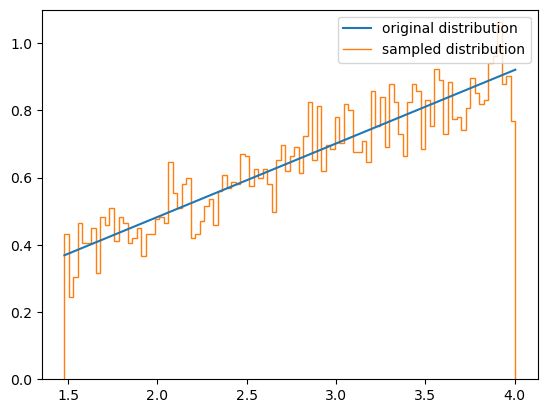

In [15]:
pd.plotLine(x, p, samples)

## III. Piecewise Linear Sampling


The cell below defines a five-section piecewise linear PDF between $x=0$ and $x=100$. 
Use the outline below as a guide to perform piecewise linear sampling for this PDF.

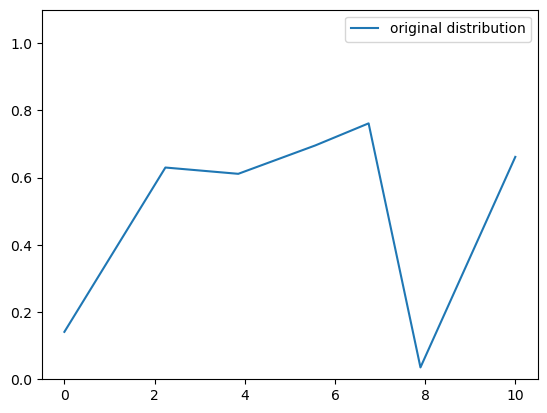

In [16]:
x, p = rd.randomPiecewiseLinear()
pd.plotPiecewiseLinear(x, p)

Remember, piecewise sampling is a multi-step process involving both direct discrete sampling and direct continuous sampling. Fill in the missing parts of the `samplePiecewiseLinear` function, outlined in the cell below, according to the following steps:

1. Discrete sampling: Select one of the piecewise portions based on the relative areas represented by each bin.
   1. Create a numpy array, `widths`, that contains N bin widths.
   2. Create a numpy array, `heights`, that contains the N average bin heights.
   3. Create a numpy array, `areas`, that contains N bin areas.
   4. Normalize a (area vector) to generate the normalized PDF probabilities, pdf.
   5. Generate the CDF, `cdf`.
   6. Generate a pseudo-random number, `prn`.
   7. Search the CDF using discrete sampling to determine which bin, `k`, is sampled.
2. Discrete sampling: Select either the triangle or lower rectangle area based on their relative areas in the same piecewise linear portion.
   1. For each piecewise portion, calculate the area of the lower rectangle, `ar`.
   2. For each piecewise portion, determine the probability of choosing the rectangle (relative to its accompanying triangle), `pr`.
   3. Generate a second pseudo-random number, `prn2`.
   4. Use `prn2` to sample whether the rectangle or triangle is to be used in the next step.
3. Continuous sampling: Now a specific portion of a single piecewise bin has been selected. Given which shape was chosen (rectangle or triangle), sample the continuous bin using the appropriate underlying PDF (either shifted uniform or shifted linear) to yield a final sample
   1. Generate a third pseudo-random number, `prn3`.
   2. Use `prn3` to determine a final sample value. The exact method will depend on whether the rectangle or triangle was selected in the steps above.
   3. Generate 10,000 samples and plot a histogram of your results ✅.  Does it match your expectations?

In [17]:
def samplePiecewiseLinear(x, p, prn1, prn2, prn3):
    """Sample a piecewise linear PDF using a random variable
    
    Parameters
    ----------
    x : Iterable of float
        The domain values of the function
    p : Iterable of float
        The probability values corresponding to domain values
    prn1 : Real
        A first pseudo-random number
    prn2 : Real
        A second pseudo-random number
    prn3 : Real
        A third pseudo-random number
        
    Returns
    -------
    float : the sampled value
    """
    # some value checking
    if len(x) < 2:
        raise ValueError('There must be at least 3 points in the domain')
    if len(x) != len(p):
        raise ValueError(f'The number of domain points ({len(x)}) and PDF points ({len(p)}) must be the same')

    # create an array of bin widths
    widths = np.diff(x) 
    # create an array of bin heights
    heights = 0.5 * (p[1:] + p[:-1])
    
    # create an array of areas of each bin
    areas = widths * heights
    
    bins = np.arange(len(areas))
    
    bin = ds.sampleDiscrete( bins, areas , prn1)  # <--- Complete this line

    out = sampleLine( np.array([x[bin], x[bin+1]]), np.array([p[bin], p[bin+1]]) , prn2, prn3)  # <--- Complete this line
    
    return out

In [18]:
# test your function by passing in some carefully selected values for the random numbers
samplePiecewiseLinear(x, p, 0.5, 0.5, 0.25)

4.28266357146411

In [21]:
# test with a small number of samples first
n_samples = 10_000
samples = np.array([samplePiecewiseLinear(x, p, np.random.rand(), np.random.rand(), np.random.rand()) for _ in range(n_samples)])

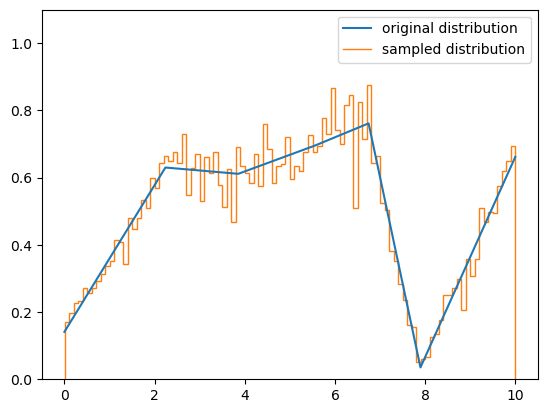

In [22]:
pd.plotPiecewiseLinear(x, p, samples)

## I. Rejection Sampling

Consider a physical process with the distribution function,

$$ 
f(t) = 2(1-t)sin^{2}(4πt) 
$$

on the interval $ -1 \leq t \lt 1 $.  

Plot this distribution ✅.

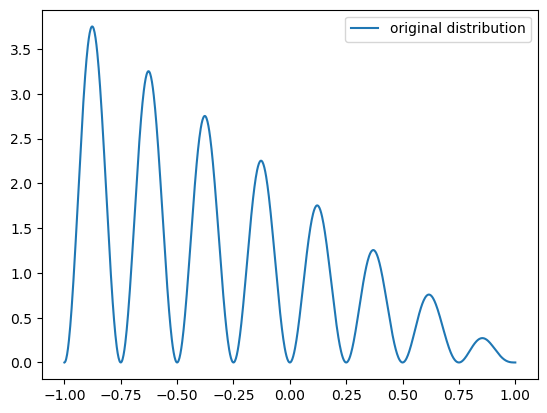

In [34]:
def pdf(t):
    return 2* (1-t) * np.sin(4*np.pi*t)**2

pd.plotContinuous(-1, 1, pdf)

### Preparatory Questions

1. Is the distribution function $f(t)$ normalized?

2. Does it need to be normalized for rejection sampling?

3. Select a bounding function?

    a. What criteria should it meet?
    
    b. Can you think of more than one potential bounding function?
    
    c. Define a function to evaluate your bounding function.
    
4. Plot the bounding function together with the original distribution function?✅

In [67]:
def bounding_func(t):
    return 2*(1-t)

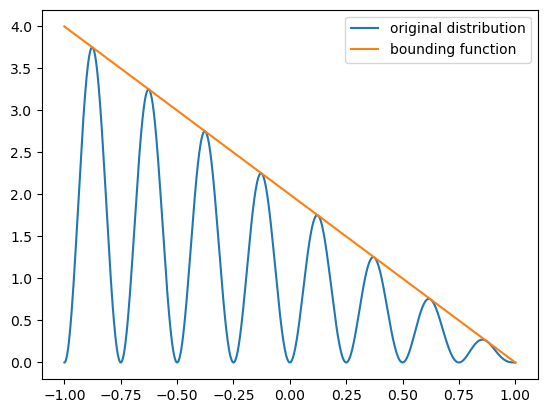

In [68]:
pd.plotContinuous(-1, 1, pdf, bounding_func)

### Implement rejection sampling using your bounding function

1. Write down in your own words what steps you need to take to implement
   rejection sampling.
   
2. Write functions to implement rejection sampling.

The skeleton of a rejection sampling is provide below, as well 
as the skeletons of two functions that may be useful as part 
of the rejection sampling algorithm, depending on your choice
of bounding function.


In [69]:
def rejectionSampling(x_min, x_max, pdf, bounding_func, bounding_func_inv_cdf, prn1, prn2):
    """
    
    Parameters
    ----------
    x_min : Real
        Lower bound of the domain
    x_max : Real
        Upper bound of the domain
    pdf : function
        Returns the value of the PDF for a given value of x
    bounding_func : function
        Returns the value of the bounding function for a given value of x
    bounding_func_inv_cdf : function
        Returns the x-value of the inverted CDF for a sampled y-value
    prn1 : Real
        A first pseudo-random number
    prn2 : Real
        A second psudo-random number
        
    Returns
    -------
    Real : the sampled value in the domain between x_min and x_max
    
    or
    
    None if rejection sampling fails to produce a sample
    
    """

    # sample a canddiate value from the bounding function, g (direct continous sampling of g)
    xp = bounding_func_inv_cdf(x_min, x_max, prn1)
    # evaluate the bounding function at the candidate value
    g = bounding_func(xp)
    # evaluate the pdf function at the candidate value
    f = pdf(xp)
    # if the sampled value is less than the ratio of the PDF(xp) to g(xp), keep it
    sample = None
    if prn2 < f/g: # <--- Complete this condition
        sample = xp
    return sample

In [70]:
# test your function with carefully selected values for the random variables
rejectionSampling(-1, 1, pdf, bounding_func, ds.sampleFallingLinear , 0.5, 0.5)

-0.41421356237309515

### Analysis

- Use rejection sampling to make 10,000 successful samples using a bounding function $g(t)=4$.
- Estimate your sampling efficiency ✅. 
   - How does your efficiency change if your bounding function is $g(t)=5$?
- How does your efficiency change if your bounding function is $g(t) = 2.5(1-t)$?

In [71]:
# test with a small number of samples first
hit_limit = 10000
hits = 0
iters = 0
samples = np.zeros(hit_limit)
while hits < hit_limit:
    sample = rejectionSampling(-1, 1, pdf, bounding_func, ds.sampleFallingLinear ,   # <--- choose a bounding function inverse
                              np.random.rand(), np.random.rand())
    if sample:
        samples[hits] = sample
        hits += 1
    iters += 1

print(f'Iterations to get {hit_limit} hits: {iters}, Sampling efficiency: {hits / iters}')

Iterations to get 10000 hits: 20044, Sampling efficiency: 0.4989024146876871


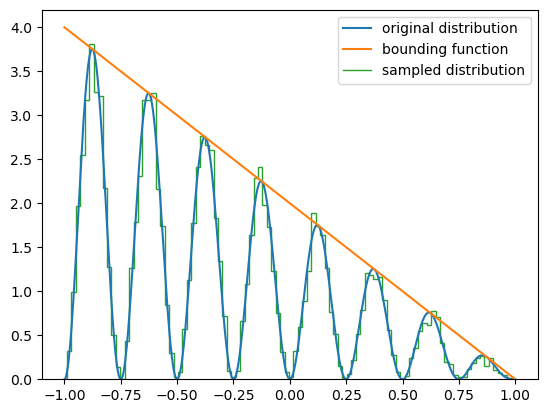

In [72]:
pd.plotContinuous(-1, 1, pdf, bounding_func, samples)